In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf
from datetime import date

In [2]:
start = '2010-01-01'
end = date.today()

yf.pdr_override()
df = pdr.get_data_yahoo("AAPL",start,end)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.505279,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.516526,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.412873,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.401019,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.443573,447610800


In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-28,157.970001,158.490005,155.979996,157.649994,157.649994,45992200
2023-03-29,159.369995,161.050003,159.350006,160.770004,160.770004,51305700
2023-03-30,161.529999,162.470001,161.270004,162.360001,162.360001,49501700
2023-03-31,162.440002,165.000000,161.910004,164.899994,164.899994,68694700
2023-04-03,164.270004,166.289993,164.220001,166.169998,166.169998,56933100


In [4]:
df = df.reset_index()

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.505279,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.516526,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.412873,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.401019,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.443573,447610800


In [5]:
df = df.drop(['Date','Adj Close'], axis=1)

df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


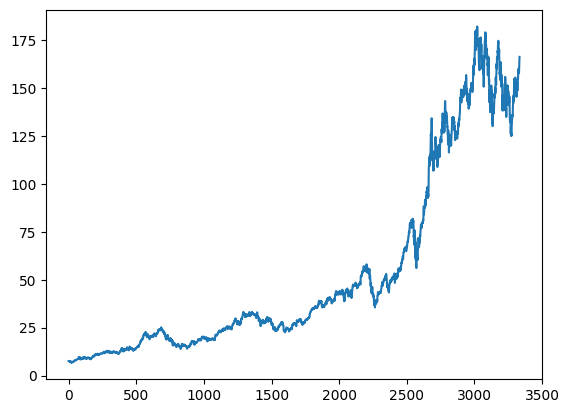

In [6]:
plt.plot(df.Close)

In [7]:
df


,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
3330,157.970001,158.490005,155.979996,157.649994,45992200
3331,159.369995,161.050003,159.350006,160.770004,51305700
3332,161.529999,162.470001,161.270004,162.360001,49501700
3333,162.440002,165.000000,161.910004,164.899994,68694700


In [8]:
MA100 = df.Close.rolling(100).mean()
MA100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3330    144.676099
3331    144.833499
3332    145.068299
3333    145.333499
3334    145.605999
Name: Close, Length: 3335, dtype: float64

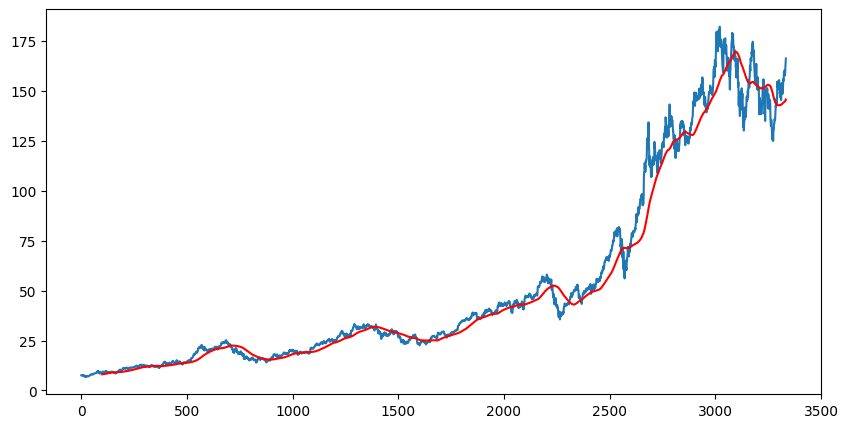

In [9]:
plt.figure(figsize = (10,5))
plt.plot(df.Close)
plt.plot(MA100,'r')

In [10]:
MA200 = df.Close.rolling(200).mean()
MA200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3330    148.066950
3331    148.185149
3332    148.337549
3333    148.498249
3334    148.651950
Name: Close, Length: 3335, dtype: float64

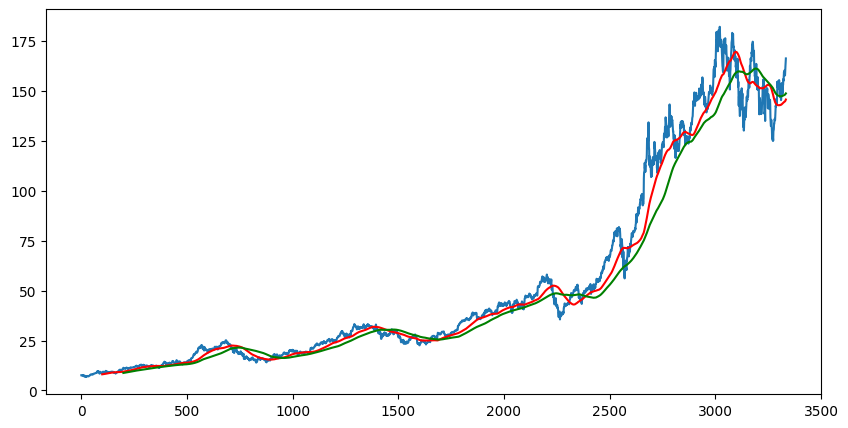

In [11]:
plt.figure(figsize = (10,5))
plt.plot(df.Close)
plt.plot(MA100,'r')
plt.plot(MA200,'g')

In [12]:
df.shape

(3335, 5)

In [13]:
#Splitting the Data into Training and Testing

data_training = pd.DataFrame(df['Close'][0 : int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70) : int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2334, 1)
(1001, 1)


In [14]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [15]:
data_testing.head()

,Close
2334,49.717499
2335,49.807499
2336,49.812500
2337,50.782501
2338,50.965000


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [17]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01533047],
       [0.01558878],
       [0.01320823],
       ...,
       [0.84083798],
       [0.84631113],
       [0.83815024]])

In [18]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train = np.array(x_train)
y_train = np.array(y_train)

In [19]:
#ML MODEL

In [20]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [21]:
model = Sequential()

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [23]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['mean_absolute_error'])
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
70/70 [==============================] - 42s 476ms/step - loss: 0.0252 - mean_absolute_error: 0.1055
Epoch 2/50
70/70 [==============================] - 33s 466ms/step - loss: 0.0066 - mean_absolute_error: 0.0566
Epoch 3/50
70/70 [==============================] - 31s 444ms/step - loss: 0.0056 - mean_absolute_error: 0.0522
Epoch 4/50
70/70 [==============================] - 29s 409ms/step - loss: 0.0057 - mean_absolute_error: 0.0544
Epoch 5/50
70/70 [==============================] - 30s 423ms/step - loss: 0.0049 - mean_absolute_error: 0.0495
Epoch 6/50
70/70 [==============================] - 26s 377ms/step - loss: 0.0045 - mean_absolute_error: 0.0477
Epoch 7/50
70/70 [==============================] - 29s 414ms/step - loss: 0.0047 - mean_absolute_error: 0.0481
Epoch 8/50
70/70 [==============================] - 28s 394ms/step - loss: 0.0042 - mean_absolute_error: 0.0465
Epoch 9/50
70/70 [==============================] - 28s 394ms/step - loss: 0.0040 - mean_absolute_error:

In [24]:
model.save('keras_model.h5')

In [25]:
data_testing.head()

,Close
2334,49.717499
2335,49.807499
2336,49.812500
2337,50.782501
2338,50.965000


In [26]:
data_training.tail(100)

,Close
2234,47.852501
2235,48.382500
2236,46.465000
2237,44.244999
2238,44.195000
...,...
2329,49.250000
2330,50.025002
2331,49.875000
2332,50.154999


In [27]:
past_100_days = data_training.tail(100)

In [28]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [29]:
final_df.head()

,Close
0,47.852501
1,48.382500
2,46.465000
3,44.244999
4,44.195000


In [30]:
input_data = scaler.fit_transform(final_df)

input_data

array([[0.08401469],
       [0.08763335],
       [0.07454126],
       ...,
       [0.865836  ],
       [0.88317828],
       [0.89184947]])

In [31]:
input_data.shape

(1101, 1)

In [32]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100 : i])
    y_test.append(input_data[i, 0])

In [33]:
x_test = np.array(x_test)
y_test = np.array(y_test)

print(x_test.shape)
print(y_test.shape)

(1001, 100, 1)
(1001,)


In [34]:
#Making Predictions

y_predicted = model.predict(x_test)

32/32 [==============================] - 5s 129ms/step


In [35]:
y_predicted.shape

(1001, 1)

In [36]:
y_test

array([0.09674831, 0.0973628 , 0.09739694, ..., 0.865836  , 0.88317828,
       0.89184947])

In [37]:
y_predicted

array([[0.1055872 ],
       [0.10710236],
       [0.10857328],
       ...,
       [0.7803249 ],
       [0.7842787 ],
       [0.7885922 ]], dtype=float32)

In [38]:
scaler.scale_

array([0.00682769])

In [39]:
scale_factor = 1/0.02123255

y_test = y_test * scale_factor
y_predicted = y_predicted * scale_factor

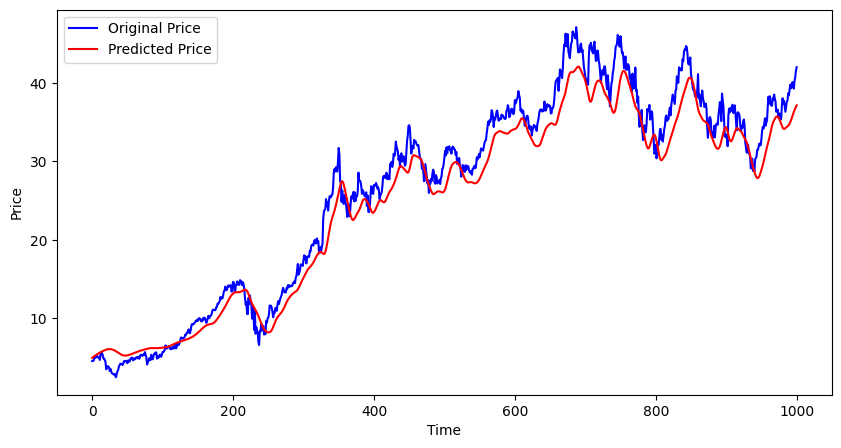

In [40]:
plt.figure(figsize=(10,5))
plt.plot(y_test, 'b', label="Original Price")
plt.plot(y_predicted, 'r', label="Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()